In [1]:
# Pip install if needed 
# pip install openmeteo-requests

In [2]:
# pip install if needed
# pip install requests-cache retry-requests numpy pandas

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler



In [4]:
weather = pd.read_csv('./data/new-york-weather.csv',header = None)
weather.columns = ['date',"daylight_duration","sunshine_duration","rain_sum","showers_sum",
                   "snowfall_sum","precipitation_hours","wind_speed_10m_max","wind_gusts_10m_max","latitude","longitude"]
weather.shape

C:\Users\graha\AppData\Local\Temp\ipykernel_21332\3871736691.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  weather = pd.read_csv('./data/new-york-weather.csv',header = None)


(288110, 11)

In [5]:
weather = weather.drop(columns = 'showers_sum')

In [6]:
weather[weather['daylight_duration'].astype(str).str.contains('day')]

,date,daylight_duration,sunshine_duration,rain_sum,snowfall_sum,precipitation_hours,wind_speed_10m_max,wind_gusts_10m_max,latitude,longitude
260028,date,daylight_duration,sunshine_duration,rain_sum,snowfall_sum,precipitation_hours,wind_speed_10m_max,wind_gusts_10m_max,latitude,longitude
274669,date,daylight_duration,sunshine_duration,rain_sum,snowfall_sum,precipitation_hours,wind_speed_10m_max,wind_gusts_10m_max,latitude,longitude


In [7]:
weather = weather.drop(weather[weather['daylight_duration'].astype(str).str.contains('day')].index)

In [8]:
weather[weather['daylight_duration'].astype(str).str.contains('day')]

,date,daylight_duration,sunshine_duration,rain_sum,snowfall_sum,precipitation_hours,wind_speed_10m_max,wind_gusts_10m_max,latitude,longitude


In [9]:
weather[["daylight_duration","sunshine_duration","rain_sum",
         "snowfall_sum","precipitation_hours","wind_speed_10m_max","wind_gusts_10m_max","latitude","longitude"]] = weather[["daylight_duration","sunshine_duration","rain_sum",
         "snowfall_sum","precipitation_hours","wind_speed_10m_max","wind_gusts_10m_max","latitude","longitude"]].apply(pd.to_numeric)

In [10]:
weather['precipitation_total'] = weather['rain_sum'] + weather['snowfall_sum'] 
weather['location'] = list(zip(weather['latitude'],weather['longitude']))
weather.head()

,date,daylight_duration,sunshine_duration,rain_sum,snowfall_sum,precipitation_hours,wind_speed_10m_max,wind_gusts_10m_max,latitude,longitude,precipitation_total,location
0,2016-01-01 05:00:00+00:00,33625.426,6485.8477,0.0,0.00,0.0,22.197730,51.120000,40.49,-79.76,0.00,"(40.49, -79.76)"
1,2016-01-02 05:00:00+00:00,33670.023,13224.7130,0.0,0.00,0.0,17.917007,43.920000,40.49,-79.76,0.00,"(40.49, -79.76)"
2,2016-01-03 05:00:00+00:00,33718.370,5694.1520,0.0,0.07,0.0,19.134262,48.239998,40.49,-79.76,0.07,"(40.49, -79.76)"
3,2016-01-04 05:00:00+00:00,33770.363,30052.8050,0.0,0.00,0.0,19.211996,47.880000,40.49,-79.76,0.00,"(40.49, -79.76)"
4,2016-01-05 05:00:00+00:00,33825.910,30114.8360,0.0,0.00,0.0,11.928989,31.319998,40.49,-79.76,0.00,"(40.49, -79.76)"


In [11]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
Index: 288108 entries, 0 to 288109
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   date                 288108 non-null  object 
 1   daylight_duration    288108 non-null  float64
 2   sunshine_duration    288108 non-null  float64
 3   rain_sum             288108 non-null  float64
 4   snowfall_sum         288108 non-null  float64
 5   precipitation_hours  288108 non-null  float64
 6   wind_speed_10m_max   288108 non-null  float64
 7   wind_gusts_10m_max   288108 non-null  float64
 8   latitude             288108 non-null  float64
 9   longitude            288108 non-null  float64
 10  precipitation_total  288108 non-null  float64
 11  location             288108 non-null  object 
dtypes: float64(10), object(2)
memory usage: 28.6+ MB


In [12]:
weather.isnull().sum()

date                   0
daylight_duration      0
sunshine_duration      0
rain_sum               0
snowfall_sum           0
precipitation_hours    0
wind_speed_10m_max     0
wind_gusts_10m_max     0
latitude               0
longitude              0
precipitation_total    0
location               0
dtype: int64

Make a clustering model with everything 

In [34]:
weather_km = weather.copy()
X = weather_km.drop(columns = ['date','location','rain_sum','snowfall_sum'])
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

# Instatiate and fit KMeans
km = KMeans(n_clusters = 5,
           random_state=42)
km.fit(X_scaled)

KMeans(n_clusters=5, random_state=42)

In [35]:
weather_km['cluster'] = km.labels_
centroids = sc.inverse_transform(km.cluster_centers_)
centroids

array([[ 4.97059025e+04,  4.06568480e+04,  1.92360373e+00,
         1.48418652e+01,  3.49543970e+01,  4.09589734e+01,
        -7.62950179e+01,  1.07385212e+00],
       [ 3.68599857e+04,  2.22674830e+04,  2.18210085e+00,
         1.56787344e+01,  3.58156385e+01,  4.17806098e+01,
        -7.62781333e+01,  7.44049278e-01],
       [ 3.95909486e+04,  2.55771929e+04,  4.76058842e+00,
         3.06155143e+01,  6.12715874e+01,  4.19576681e+01,
        -7.65258549e+01,  2.27543933e+00],
       [ 4.37626872e+04,  8.15371825e+03,  1.53756800e+01,
         2.05186587e+01,  4.80847593e+01,  4.18975437e+01,
        -7.65104274e+01,  1.49804744e+01],
       [ 5.00457312e+04,  4.07950405e+04,  2.18304513e+00,
         1.59009414e+01,  3.50099400e+01,  4.29996415e+01,
        -7.67521383e+01,  1.17363914e+00]])

In [36]:
centroids = pd.DataFrame(
    centroids,
    columns=X.columns
)
centroids

,daylight_duration,sunshine_duration,precipitation_hours,wind_speed_10m_max,wind_gusts_10m_max,latitude,longitude,precipitation_total
0,49705.902503,40656.848035,1.923604,14.841865,34.954397,40.958973,-76.295018,1.073852
1,36859.985653,22267.482982,2.182101,15.678734,35.815639,41.780610,-76.278133,0.744049
2,39590.948568,25577.192922,4.760588,30.615514,61.271587,41.957668,-76.525855,2.275439
3,43762.687170,8153.718252,15.375680,20.518659,48.084759,41.897544,-76.510427,14.980474
4,50045.731239,40795.040488,2.183045,15.900941,35.009940,42.999642,-76.752138,1.173639


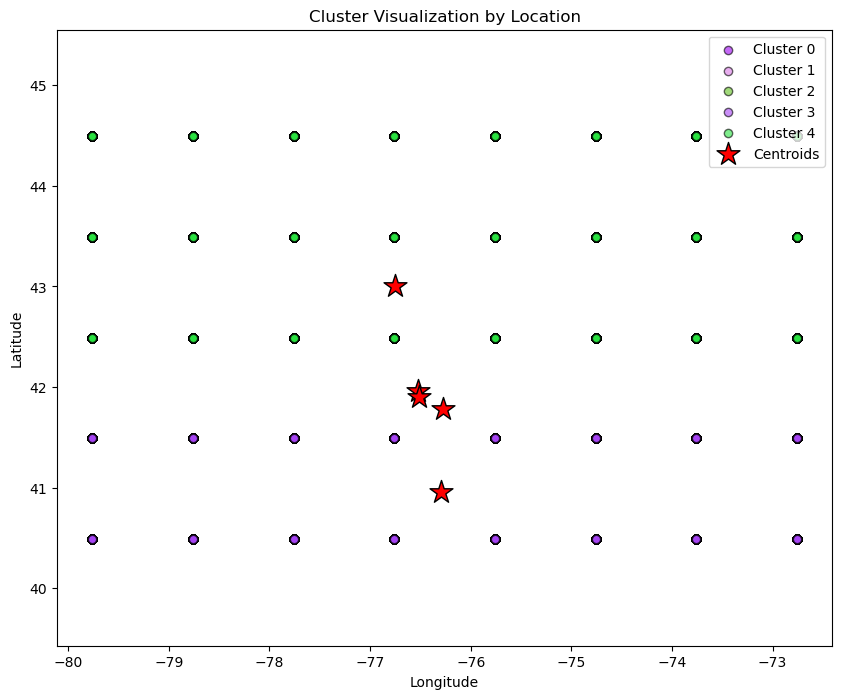

In [37]:
# Generate random RGB colors for clusters
def generate_colors(n_clusters):
    return np.random.rand(n_clusters, 3)


n_clusters = len(np.unique(weather_km['cluster']))
colors = generate_colors(n_clusters)

# Scatterplot for clusters
plt.figure(figsize=(10, 8))
for cluster in np.unique(weather_km['cluster']):
    cluster_data = weather_km[weather_km['cluster'] == cluster]
    plt.scatter(
        cluster_data['longitude'],  # Longitude on x-axis
        cluster_data['latitude'],   # Latitude on y-axis
        c=[colors[cluster]], alpha=0.6, edgecolor="k",
        label=f"Cluster {cluster}"
    )

# Plot centroids
plt.scatter(
    centroids['longitude'], 
    centroids['latitude'],
    c="red", marker="*", s=300, label="Centroids", edgecolor="black"
)

# Add labels and title
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Cluster Visualization by Location")
plt.legend()

# Ensure proper aspect ratio for geographic data
plt.axis("equal")
plt.show()

